Dataset loaded. Shape: (88295, 3)
Remaining after removing empty text: (88284, 3)

Model Performance:
Accuracy:  0.9540
Precision: 0.9599
Recall:    0.9922
F1 Score:  0.9758


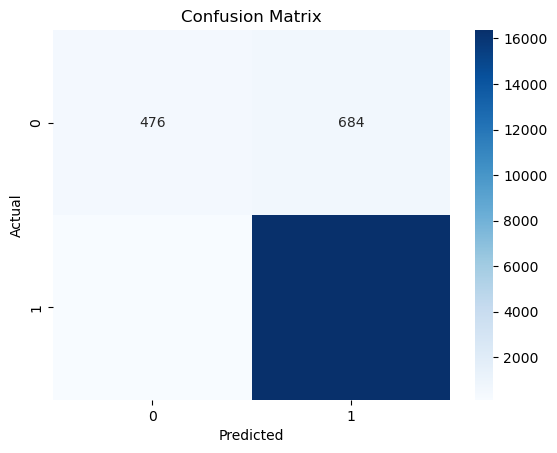


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.41      0.54      1160
           1       0.96      0.99      0.98     16497

    accuracy                           0.95     17657
   macro avg       0.87      0.70      0.76     17657
weighted avg       0.95      0.95      0.95     17657



In [3]:
# 02_model_training.ipynb
# Train a Logistic Regression model on phishing email data

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load cleaned data
df = pd.read_csv('../data/cleaned_emails.csv')
print("Dataset loaded. Shape:", df.shape)

# Step 2: Drop missing or empty clean_text rows
df = df.dropna(subset=['clean_text'])
df = df[df['clean_text'].str.strip().astype(bool)]
print("Remaining after removing empty text:", df.shape)

# Step 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
